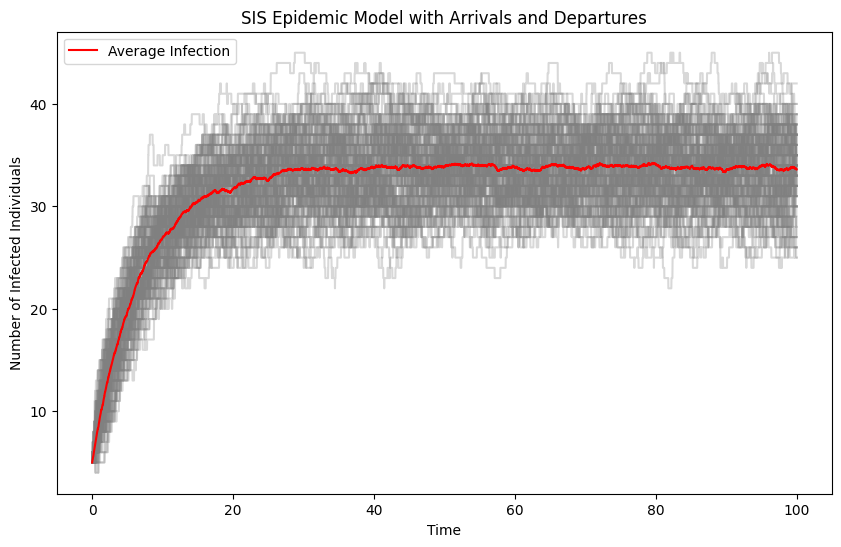

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
beta = 0.1  # Infection rate
delta = 0.05  # Recovery rate
mu_a = 0.02  # Arrival rate
mu_d = 0.01  # Departure rate
T = 100  # Total time
dt = 0.01  # Time step
N_simulations = 100  # Number of simulations

def simulate_sis(T, dt, beta, delta, mu_a, mu_d):
    # Initialize time and state variables
    t = np.arange(0, T + dt, dt)
    N = len(t)
    V = np.zeros(N)  # Infected individuals
    V[0] = 5  # Initial number of infected individuals
    total_population = 50  # Initial total population

    # Simulate the dynamics
    for i in range(1, N):
        recovery_events = np.random.binomial(V[i-1], delta*dt)
        if total_population - V[i-1] > 0:
            infection_events = np.random.binomial(total_population - V[i-1], beta*dt)
        else:
            infection_events = 0
        arrival_events = np.random.poisson(mu_a*dt)
        departure_events = np.random.poisson(mu_d*dt)
        
        # Update the state
        V[i] = np.maximum(0, V[i-1] + infection_events - recovery_events)
        # Handle population changes
        total_population = np.maximum(1, total_population + arrival_events - departure_events)
        V[i] = min(V[i], total_population)  # Infected cannot exceed the total population
        
    return t, V

# Simulation
results = []
for i in range(N_simulations):
    _, V = simulate_sis(T, dt, beta, delta, mu_a, mu_d)
    results.append(V)

# Compute the average across all simulations
average_infection = np.mean(results, axis=0)

# Plotting
plt.figure(figsize=(10, 6))
for V in results:
    plt.plot(_, V, color='gray', alpha=0.3)  # Individual realizations
plt.plot(_, average_infection, color='red', label='Average Infection')  # Average
plt.xlabel('Time')
plt.ylabel('Number of Infected Individuals')
plt.legend()
plt.title('SIS Epidemic Model with Arrivals and Departures')
plt.show()
